In [2]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

/tmp/ipykernel_73962/1028975186.py:8: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter
/home/aidin/anaconda3/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/aidin/anaconda3/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefINS2_6SymIntEEENS2_8optionalINS2_10ScalarTypeEEENS6_INS2_6LayoutEEENS6_INS2_6DeviceEEENS6_IbEENS6_INS2_12MemoryFormatEEE
  warn(f"Failed to load image Python extension: {e}")


In [3]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [4]:
root = 'mall_dataset'

path_sets = os.path.join(
    root,
    'frames'
)

img_paths = []
for path in [path_sets]:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [5]:
model = CSRNet()

/home/aidin/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/aidin/anaconda3/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
model = model.cpu()

In [7]:
best_model = 'PartAmodel_best.pth.tar'

checkpoint = torch.load(
    os.path.join(
        'trained_models',
        best_model
    ),
    map_location=torch.device('cpu')
)
model.load_state_dict(checkpoint['state_dict'])

In [9]:
mae = 0
total_images = len(img_paths)

for i, img_path in enumerate(img_paths):
    img = 255.0 * F.to_tensor(Image.open(img_path).convert('RGB'))
    img[0, :, :] -= 92.8207477031
    img[1, :, :] -= 95.2757037428
    img[2, :, :] -= 104.877445883
    #img = img.cpu()
    img = transform(Image.open(img_paths[i]).convert('RGB')).cpu()

    gt_file = h5py.File(img_path.replace('.jpg', '.h5').replace('frames', 'ground_truth'), 'r')
    groundtruth = np.asarray(gt_file['density'])

    output = model(img.unsqueeze(0))

    absolute_difference = np.abs(output.detach().cpu().sum().numpy() - np.sum(groundtruth))
    mae += absolute_difference

    print(f"Processed image {i + 1}/{total_images} - MAE: {absolute_difference}")

average_mae = mae / total_images
print(f"\nAverage MAE: {average_mae}")


Processed image 1/2000 - MAE: 6.216165542602539
Processed image 2/2000 - MAE: 8.057931900024414
Processed image 3/2000 - MAE: 9.74858283996582
Processed image 4/2000 - MAE: 17.325904846191406
Processed image 5/2000 - MAE: 9.96175765991211
Processed image 6/2000 - MAE: 13.611274719238281
Processed image 7/2000 - MAE: 8.365859985351562
Processed image 8/2000 - MAE: 4.298038482666016
Processed image 9/2000 - MAE: 9.335820198059082
Processed image 10/2000 - MAE: 8.137587547302246
Processed image 11/2000 - MAE: 14.218494415283203
Processed image 12/2000 - MAE: 9.523059844970703
Processed image 13/2000 - MAE: 12.923301696777344
Processed image 14/2000 - MAE: 18.362707138061523
Processed image 15/2000 - MAE: 15.661418914794922
Processed image 16/2000 - MAE: 18.057891845703125
Processed image 17/2000 - MAE: 12.201719284057617
Processed image 18/2000 - MAE: 8.405447006225586
Processed image 19/2000 - MAE: 7.116983413696289
Processed image 20/2000 - MAE: 9.57427978515625
Processed image 21/2000 

In [10]:
output = model(img.unsqueeze(0))

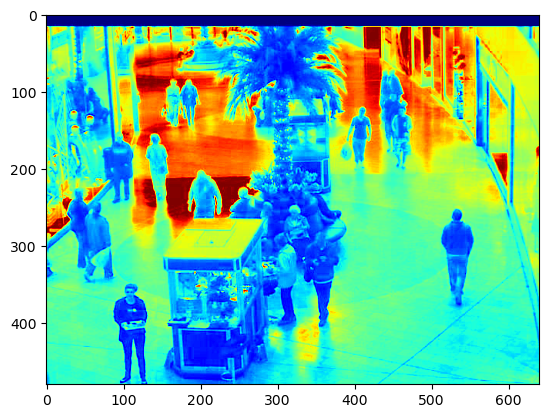

In [11]:
plt.imshow(img[2].detach().cpu().numpy(), cmap=CM.jet)

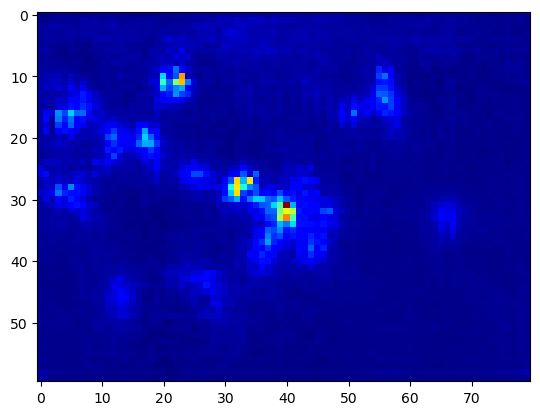

In [12]:
plt.imshow(output.detach().cpu().squeeze().numpy(), cmap=CM.jet)

In [13]:
output.detach().cpu().squeeze().numpy().sum()

21.377653

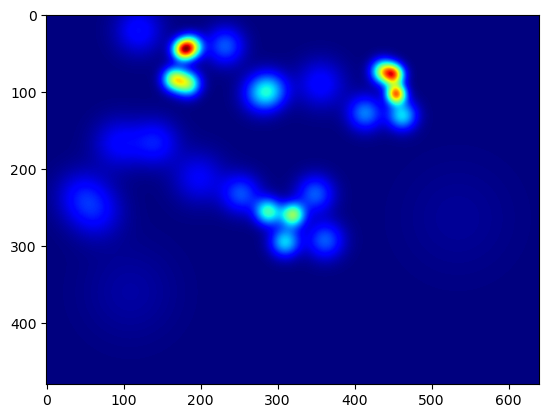

In [15]:
gt_file = h5py.File(img_paths[-1].replace('.jpg','.h5').replace('frames','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [16]:
best_model = 'partBmodel_best.pth.tar'

checkpoint = torch.load(
    os.path.join(
        'trained_models',
        best_model
    ),
    map_location=torch.device('cpu')
)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [17]:
mae = 0
total_images = len(img_paths)

for i, img_path in enumerate(img_paths):
    img = 255.0 * F.to_tensor(Image.open(img_path).convert('RGB'))
    img[0, :, :] -= 92.8207477031
    img[1, :, :] -= 95.2757037428
    img[2, :, :] -= 104.877445883
    #img = img.cpu()
    img = transform(Image.open(img_paths[i]).convert('RGB')).cpu()

    gt_file = h5py.File(img_path.replace('.jpg', '.h5').replace('frames', 'ground_truth'), 'r')
    groundtruth = np.asarray(gt_file['density'])

    output = model(img.unsqueeze(0))

    absolute_difference = np.abs(output.detach().cpu().sum().numpy() - np.sum(groundtruth))
    mae += absolute_difference

    print(f"Processed image {i + 1}/{total_images} - MAE: {absolute_difference}")

average_mae = mae / total_images
print(f"\nAverage MAE: {average_mae}")



Processed image 1/2000 - MAE: 6.984712600708008
Processed image 2/2000 - MAE: 6.691562652587891
Processed image 3/2000 - MAE: 5.999937057495117
Processed image 4/2000 - MAE: 14.879112243652344
Processed image 5/2000 - MAE: 7.391733169555664
Processed image 6/2000 - MAE: 11.324190139770508
Processed image 7/2000 - MAE: 8.10474967956543
Processed image 8/2000 - MAE: 6.309652328491211
Processed image 9/2000 - MAE: 7.617809295654297
Processed image 10/2000 - MAE: 8.104609489440918
Processed image 11/2000 - MAE: 11.944570541381836
Processed image 12/2000 - MAE: 7.807329177856445
Processed image 13/2000 - MAE: 10.135490417480469
Processed image 14/2000 - MAE: 13.547706604003906
Processed image 15/2000 - MAE: 15.862016677856445
Processed image 16/2000 - MAE: 14.0504150390625
Processed image 17/2000 - MAE: 9.93448257446289
Processed image 18/2000 - MAE: 5.226930618286133
Processed image 19/2000 - MAE: 6.4604339599609375
Processed image 20/2000 - MAE: 5.480180740356445
Processed image 21/2000 -

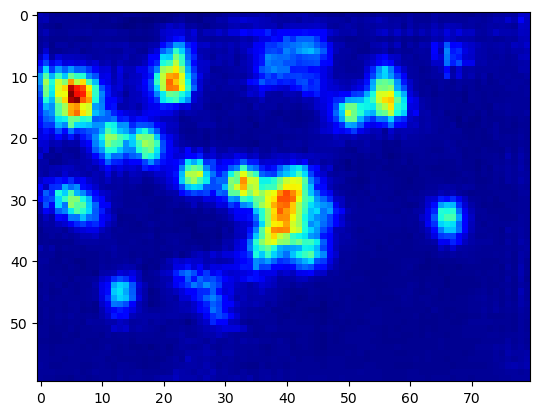

In [18]:
plt.imshow(output.detach().cpu().squeeze().numpy(), cmap=CM.jet)
